# Getting Started

### Import modules

In [1]:
from rlway.pyosrd.osrd import OSRD

from rlway_cpagent.cp_agent import CPAgent
from rlway.schedules import Schedule, schedule_from_osrd

# When using in a notebook, minizinc requires the following commands
import nest_asyncio
nest_asyncio.apply()

### Load a use case and add delays

In [2]:
# Load an OSRD use case
ref = OSRD(use_case='station_capacity2', dir='tmp')
# Clear the tmp delays
ref.reset_delays()
# Add a new delay to the use case
ref.add_delay('train0', time_threshold=150, delay=800.)
delayed = ref.delayed()

[10:24:43,071] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[10:24:43,112] [INFO]              [FullInfra] parsing infra
[10:24:43,212] [INFO]              [FullInfra] adaptation to kotlin
[10:24:43,269] [INFO]              [FullInfra] loading signals
[10:24:43,283] [INFO]              [FullInfra] building blocks
[10:24:43,288] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[10:24:43,301] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.0
[10:24:43,360] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.1
[10:24:43,365] [INFO]  [StandaloneSimulationCommand] All simulations completed
[10:24:43,366] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json


### Visualize use case

In [3]:
# Convert the simulation in a format more suitable for visualization
delayed_schedule = schedule_from_osrd(delayed)

In [4]:
# Draw the infrastructure
delayed_schedule.draw_graph()

<Axes: xlabel='Time'>

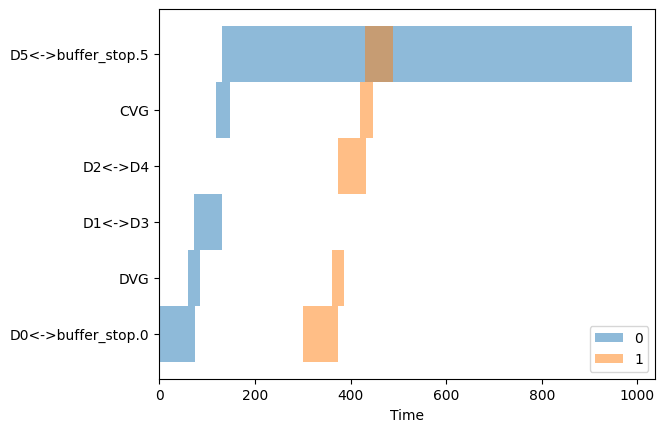

In [5]:
# Plot the space/time graph
delayed_schedule.plot()

### Compute an optimal regulation using CpAgent

In [6]:
regulated = ref.regulate(agent=CPAgent("cp_agent"))
regulated_schedule = schedule_from_osrd(regulated)

NameError: name 'sim' is not defined

## Compare output

<Axes: xlabel='Time'>

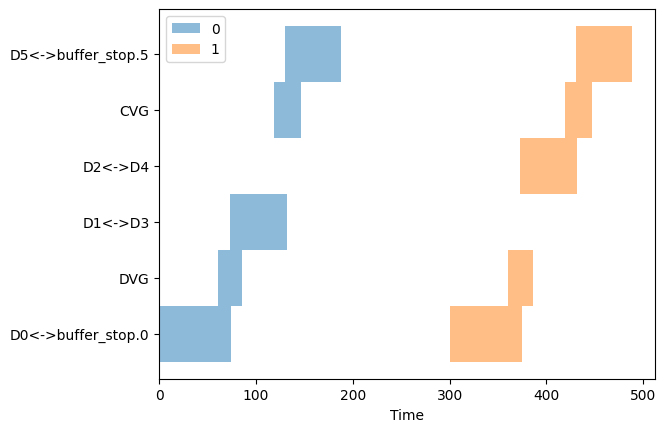

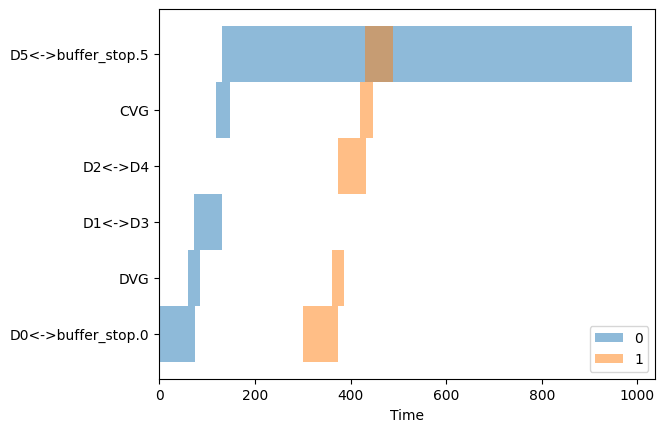

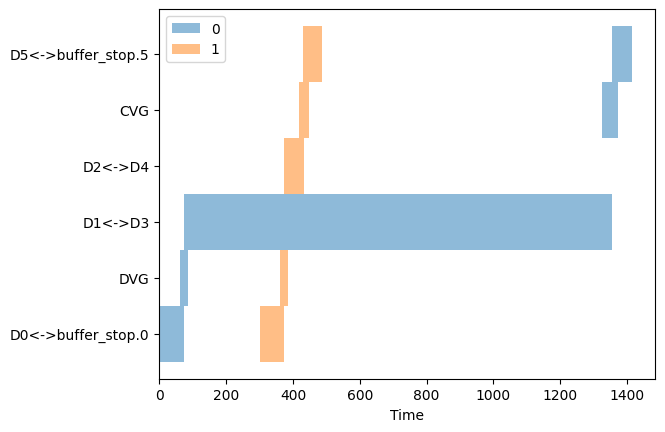

In [ ]:
delayed_schedule.plot()
regulated_schedule.plot()